In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
%matplotlib

loc = 'workstation'
if loc == 'laptop':
    #eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools'
    eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/tools'
    wd         = '/Users/sammichekroud/Desktop/postdoc/wmconfidence' #working on confidence data, but in postdoc dir
elif loc == 'workstation':
    eyefuncdir = 'C:/Users/sammirc/Desktop/postdoc/tools/'
    wd         =  'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
os.chdir(wd)
sys.path.insert(0, eyefuncdir)
import eyefuncs as eyes

eyedir = op.join(wd, 'data', 'eyes')
bdir   = op.join(wd, 'data', 'datafiles')

subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,             13, 14, 15,     17,         20, 21, 22,     24, 25, 26])
nsubs = subs.size

#set some params here
modeltimes = np.round(np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy')), 2)
eyetimes   = np.round(np.load(op.join(wd, 'data', 'glms', 'glm3', 'eyetracker_times.npy')), 2)
regnames   = np.load(op.join(wd, 'data', 'glms', 'glm3', 'regressor_names.npy'))

nparams = regnames.size
#ppts x tuning curve timepoints x regressors x
b = np.zeros(shape = [nsubs, modeltimes.size, nparams, eyetimes.size]) * np.nan
t = np.zeros(shape = [nsubs, modeltimes.size, nparams, eyetimes.size]) * np.nan

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
use_b = True
if use_b:
    paramind = 0
    addtext = 'modelAmplitudeBeta'
elif not use_b:
    paramind = 1
    addtext = 'modelAmplitudeTvalue'
fittype = 'glm'
if fittype == 'opt':
    fittext = 'b1optfit'
elif fittype == 'glm':
    fittext = 'b1glmfit'
b = np.zeros(shape = [nsubs, regnames.size, modeltimes.size, eyetimes.size]) * np.nan
t = np.zeros_like(b) * np.nan
subcount = -1
for sub in subs:
    subcount += 1
    ib = np.load(op.join(wd, 'data', 'glms', 'glm3', f'wmc_s{sub:02d}_glm3_betas_{fittext}_{addtext}.npy')) #has shape: tuning curve time x regressors x eyetracker time
    it = np.load(op.join(wd, 'data', 'glms', 'glm3', f'wmc_s{sub:02d}_glm3_tvalues_{fittext}_{addtext}.npy'))
    b[subcount] = ib.copy()
    t[subcount] = it.copy()
bm = np.nanmean(b, axis=0) #average across participants

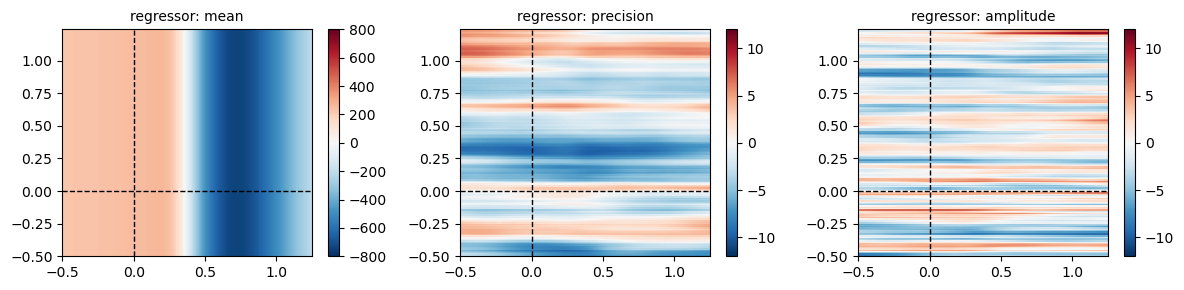

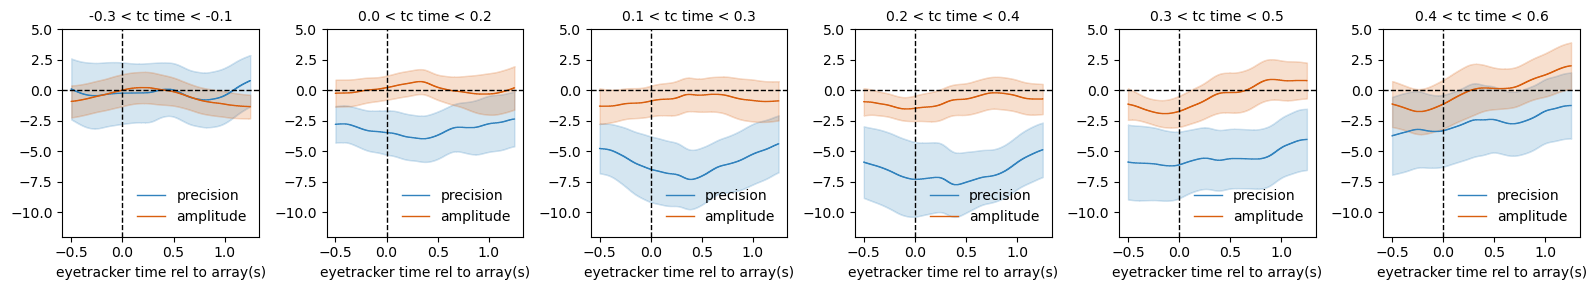

In [4]:
fig = plt.figure(figsize = [12, 3])
for iparam in range(nparams):
    if iparam == 0:
        vmin, vmax = -800, 800
    else:
        vmin, vmax = -12, 12
    ax = fig.add_subplot(1, 3, iparam+1)
    plot = ax.imshow(bm[iparam].squeeze(), aspect= 'auto', interpolation='none', cmap='RdBu_r', origin = 'lower',
                     vmin = vmin, vmax = vmax, 
                     extent = [eyetimes.min(), eyetimes.max(), modeltimes.min(), modeltimes.max()])
    ax.set_title(f'regressor: {regnames[iparam]}', fontsize = 10)
    ax.axvline(0, ls = 'dashed', color = 'k', lw = 1)
    ax.axhline(0, ls = 'dashed', color = 'k', lw = 1)
    fig.colorbar(plot)
fig.tight_layout()

mstarts = [-0.3, 0.0, 0.1, 0.2, 0.3, 0.4]
mends   = [-0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
nplots = len(mstarts)
cols = ['#3182bd', '#d95f0e']
fig = plt.figure(figsize = [16, 3])
for iplot, istart, iend in zip(range(nplots), mstarts, mends):
    # print(iplot, istart, iend)
    ax = fig.add_subplot(1, nplots, iplot+1)
    tinds = np.logical_and(modeltimes >= istart, modeltimes <= iend)
    plotd = b[:, :, tinds].mean(axis=2) #average across the timewindow
    plotm = plotd.mean(axis=0) #average across participants
    plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')

    #loop over regressors
    for ireg in range(2):
        ax.plot(eyetimes, plotm[ireg+1], label = regnames[ireg+1], lw = 1, c = cols[ireg])
        ax.fill_between(eyetimes,
                        np.add(plotm[ireg+1], plotsem[ireg+1]),
                        np.subtract(plotm[ireg+1], plotsem[ireg+1]),
                        edgecolor=None, alpha = 0.2, color = cols[ireg])
    ax.axhline(0, lw = 1, ls = 'dashed', color='k')
    ax.axvline(0, lw = 1, ls = 'dashed', color='k')
    ax.set_title(f'{istart} < tc time < {iend}', fontsize = 10)
    ax.set_ylim([-12, 5])
    ax.set_xlabel('eyetracker time rel to array(s)', fontsize = 10)
    ax.legend(loc = 'lower right', frameon=False)
fig.tight_layout()

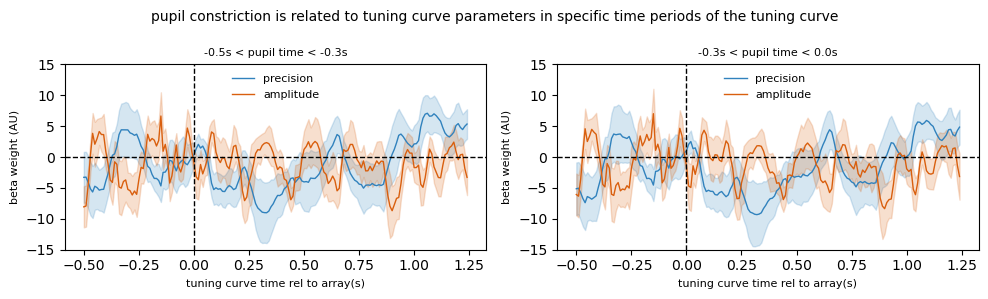

In [5]:
mstarts = [-0.5, -0.3]
mends   = [-0.3,  0.0]
nplots = len(mstarts)
cols = ['#3182bd', '#d95f0e']
labs = ['precision', 'amplitude']
fig = plt.figure(figsize = [10, 3])
for iplot, istart, iend in zip(range(nplots), mstarts, mends):
    ax = fig.add_subplot(1, nplots, iplot+1)
    # print(iplot, istart, iend)
    tinds = np.logical_and(eyetimes >= istart, eyetimes <= iend)
    for ireg in range(2):
        plotd = b[:,:,:,tinds].mean(-1)
        plotd = plotd[:,ireg+1] #take just the relevant parameter
        plotm = plotd.mean(axis=0) #average across participants
        plotsem = sp.stats.sem(plotd, axis=0, ddof=0, nan_policy='omit')
    
        ax.plot(modeltimes, plotm, label = labs[ireg], lw = 1, c = cols[ireg])
        ax.fill_between(modeltimes,
                        np.add(plotm, plotsem),
                        np.subtract(plotm, plotsem),
                        edgecolor=None, alpha = 0.2, color = cols[ireg])
    ax.axhline(0, lw = 1, ls = 'dashed', color='k')
    ax.axvline(0, lw = 1, ls = 'dashed', color='k')
    ax.set_title(f'{istart}s < pupil time < {iend}s', fontsize = 8)
    ax.set_ylim([-15, 15])
    ax.set_xlabel('tuning curve time rel to array(s)', fontsize = 8)
    ax.set_ylabel('beta weight (AU)', fontsize = 8)
    ax.legend(loc = 'upper center', frameon=False, fontsize=8)
fig.suptitle('pupil constriction is related to tuning curve parameters in specific time periods of the tuning curve', fontsize = 10)
fig.tight_layout()